# Text Summarization & Visualization

## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 41kB/s  eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.11.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: scipy>=0.18.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: six>=1.5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: boto>=2.32 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: boto3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: charde

In [2]:
!pip install watson-developer-cloud==1.5

    100% |████████████████████████████████| 225kB 3.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: python_dateutil>=2.5.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
    100% |████████████████████████████████| 307kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 253kB/s eta 0:00:01
Requirement not upgraded as not directly required: pyOpenSSL>=16.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.0->watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/py

In [3]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 623kB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.23.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numpy>=1.9.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: scipy>=0.18.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: pandas>=0.17.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
    100% |████████████████████████████████| 276kB 3.8MB/s eta 0:00:01
Requirement not upgraded as not directly required: jinja2>=2.7.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numexpr in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgr

In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 2.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


In [5]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
import ibm_boto3
from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/ds

True

## Read the Data
Click on Insert to code and then select Insert Credentials

In [6]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IBM_API_KEY_ID': 'ZQaQTJZmYnMqH-o1o1Wlj3of5wGBnXYIFrS2jbSI5lBn',
    'IAM_SERVICE_ID': 'iam-ServiceId-8f35ab10-73ea-42f4-940b-5cdc73a2395d',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'patterns-donotdelete-pr-fo226lhyda6jup',
    'FILE': 'Mission_Impossible_6_Review.txt'
}

### Functions to extract files from Cloud Object Storage

In [7]:
cos = ibm_boto3.client('s3',
                    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                    config=Config(signature_version='oauth'),
                    endpoint_url=credentials_1['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

### Read the file

In [8]:
text=str(load_string(get_file("Mission_Impossible_6_Review.txt")))

### Helper functions to extract summary and keywords

In [9]:
def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [10]:
print('Printing Summary')
print('--------------------------')
print(get_summary(text, 0.3))
print ('-------------------------')
print('Printing Keywords')
print('--------------------------')
print(get_keywords(text))

Printing Summary
--------------------------
['b"Before its release, Mission: Impossible Fallout has been known for two things: the fact that it\'s the first direct sequel in the series and THAT injury to Tom Cruise.Let\'s get the injury out of the way first.', "The shot is in the movie and it will make you wince because you know the context, but otherwise you don't really notice any difference as the stunt in question is just the latest in a long line of deathdefying activities featuring Cruise.What makes more of an impact on the sixth movie in the series is its connection to the previous movie, Rogue Nation, with the return of the villainous Solomon Lane (played creepily again by Sean Harris) and his nefarious Syndicate, who are again threatening the world.With the addition of Ethan Hunt's former wife Julia (Michelle Monaghan) from the third movie, Fallout is immediately given more depth than previous outings and the stakes feel higher, with Ethan Hunt (Cruise) haunted by his past mis

### Remove punctuation & special characters

In [11]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

### Preprocess the text for next steps

In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### Create n grams where n is the number of words

In [13]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [14]:
print(total_grams[:10])

[('bBefore', 'release', 'Mission', 'Impossible', 'Fallout', 'known', 'two'), ('release', 'Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing'), ('Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing', 'fact'), ('Impossible', 'Fallout', 'known', 'two', 'thing', 'fact', 'first'), ('Fallout', 'known', 'two', 'thing', 'fact', 'first', 'direct'), ('known', 'two', 'thing', 'fact', 'first', 'direct', 'sequel'), ('two', 'thing', 'fact', 'first', 'direct', 'sequel', 'series'), ('thing', 'fact', 'first', 'direct', 'sequel', 'series', 'THAT'), ('fact', 'first', 'direct', 'sequel', 'series', 'THAT', 'injury'), ('first', 'direct', 'sequel', 'series', 'THAT', 'injury', 'Tom')]


### Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

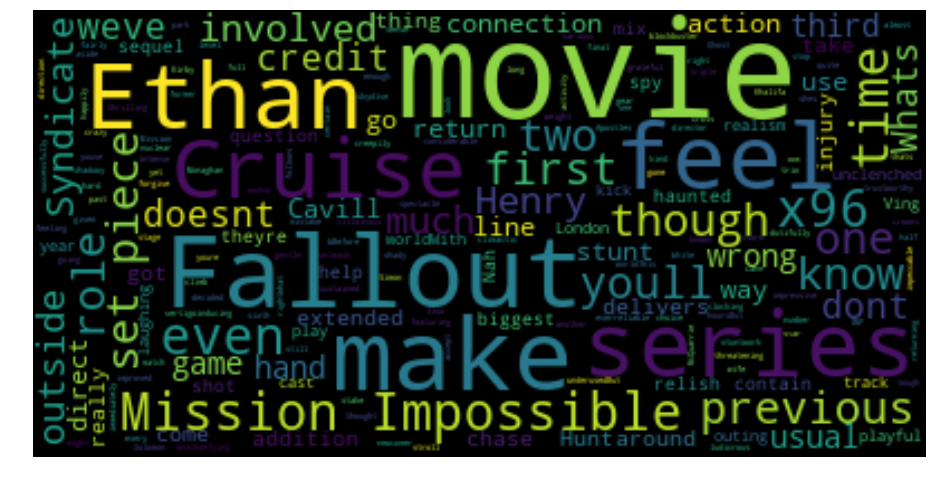

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analyze the frequency of words in the text. 

In [16]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

Cruise was found 4 times
Mission was found 4 times
movie was found 12 times
even was found 4 times
series was found 5 times
get was found 4 times
Fallout was found 6 times
time was found 4 times
feel was found 5 times
Impossible was found 4 times
make was found 6 times
x96 was found 4 times
Ethan was found 4 times


### Create a Dispersion plot
The motivation behind using the Lexical Dispersion Plots was to give us an alternative means of visualising how prevalent  these words are in the text corpus, whether or not there was a clustering pattern that is whether or not a word featured heavily at certain point of the text corpus.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


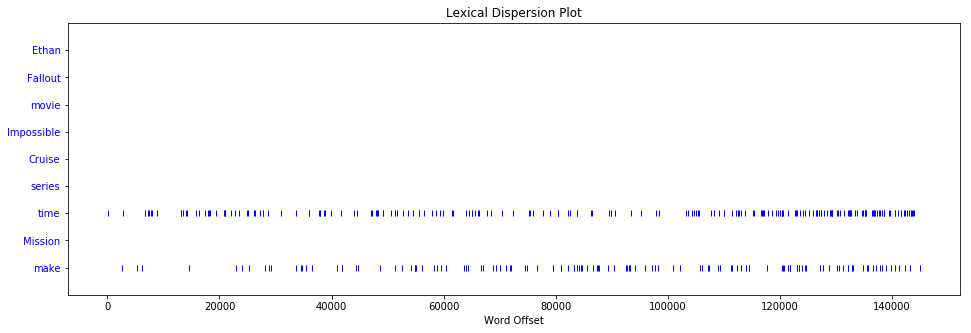

In [17]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

### Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [18]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

### Creating the object for LDA model & train the model

In [19]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

### Extract two topics with twenty words in each topic

In [20]:
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.024*"movie" + 0.017*"fallout" + 0.014*"impossible" + 0.012*"cruise" + 0.012*"theres" + 0.012*"get" + 0.012*"even" + 0.009*"first" + 0.009*"role" + 0.009*"one" + 0.006*"direct" + 0.006*"line" + 0.006*"make" + 0.006*"syndicate" + 0.006*"injury" + 0.006*"use" + 0.006*"cavill" + 0.006*"stunt" + 0.006*"wrong" + 0.006*"its"'), (1, '0.014*"mission" + 0.014*"series" + 0.011*"makes" + 0.011*"feel" + 0.011*"ethan" + 0.009*"like" + 0.009*"previous" + 0.009*"youll" + 0.009*"set" + 0.009*"two" + 0.009*"though" + 0.009*"movies" + 0.006*"addition" + 0.006*"extended" + 0.006*"connection" + 0.006*"dont" + 0.006*"third" + 0.006*"pieces" + 0.006*"doesnt" + 0.006*"come"')]


#### Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [21]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.64258361504

Coherence Score:  0.86222345441


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [22]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      50.192631        1       1  0.084322  0.0
0      49.807369        1       2 -0.084322  0.0, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
80    Default  5.000000          movie  5.000000  30.0000  30.0000
74    Default  3.000000        fallout  3.000000  29.0000  29.0000
320   Default  3.000000     impossible  3.000000  28.0000  28.0000
289   Default  3.000000        mission  3.000000  27.0000  27.0000
72    Default  3.000000         series  3.000000  26.0000  26.0000
153   Default  2.000000         theres  2.000000  25.0000  25.0000
20    Default  2.000000         cruise  2.000000  24.0000  24.0000
90    Default  2.000000           even  2.000000  23.0000  23.0000
149   Default  2.000000            get  2.000000  22.0000  22.0000
305   Default  2.000000          makes  2.000000  21.0000  21.0000
264   Default  2.000000          ethan  2.000000  20.0000  20.0000
240   Default  2.000000           feel  2.000000  19.0000  19.0000
59    Default  2.000000           role  2.000000  18.0000  18.0000
142   Default  2.000000            one  2.000000  17.0000  17.0000
211   Default  2.000000          first  2.000000  16.0000  16.0000
228   Default  2.000000          youll  2.000000  15.0000  15.0000
336   Default  2.000000            set  2.000000  14.0000  14.0000
144   Default  2.000000            two  2.000000  13.0000  13.0000
212   Default  2.000000           like  2.000000  12.0000  12.0000
267   Default  2.000000       previous  2.000000  11.0000  11.0000
118   Default  2.000000         though  2.000000  10.0000  10.0000
194   Default  2.000000         movies  2.000000   9.0000   9.0000
134   Default  1.000000            use  1.000000   8.0000   8.0000
338   Default  1.000000         injury  1.000000   7.0000   7.0000
93    Default  1.000000         cavill  1.000000   6.0000   6.0000
64    Default  1.000000          wrong  1.000000   5.0000   5.0000
23    Default  1.000000            its  1.000000   4.0000   4.0000
181   Default  1.000000         direct  1.000000   3.0000   3.0000
126   Default  1.000000           line  1.000000   2.0000   2.0000
108   Default  1.000000      syndicate  1.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
59     Topic2  1.969533           role  2.264620   0.5574  -4.7165
142    Topic2  1.969533            one  2.264620   0.5574  -4.7165
211    Topic2  1.969533          first  2.264620   0.5574  -4.7165
134    Topic2  1.403079            use  1.698390   0.5060  -5.0556
338    Topic2  1.403079         injury  1.698390   0.5060  -5.0556
93     Topic2  1.403079         cavill  1.698390   0.5060  -5.0556
280    Topic2  1.403079           make  1.698390   0.5060  -5.0556
108    Topic2  1.403079      syndicate  1.698390   0.5060  -5.0556
126    Topic2  1.403079           line  1.698390   0.5060  -5.0556
181    Topic2  1.403079         direct  1.698390   0.5060  -5.0556
64     Topic2  1.403079          wrong  1.698390   0.5060  -5.0556
23     Topic2  1.403079            its  1.698390   0.5060  -5.0556
214    Topic2  1.403079          stunt  1.698390   0.5060  -5.0556
12     Topic2  1.403079          whats  1.698390   0.5060  -5.0556
157    Topic2  1.403079            got  1.698390   0.5060  -5.0556
99     Topic2  1.403079       involved  1.698390   0.5060  -5.0556
65     Topic2  1.403079          games  1.698390   0.5060  -5.0556
13     Topic2  1.403079           much  1.698390   0.5060  -5.0556
223    Topic2  1.403079          henry  1.698390   0.5060  -5.0556
169    Topic2  1.403079         action  1.698390   0.5060  -5.0556
186    Topic2  1.403079          knows  1.698389   0.5060  -5.0556
111    Topic2  1.403079          usual  1.698390   0.5060  -5.0556
217    Topic2  0.836282           seen  1.132159   0.3941  -5.5731
335    To

#### We can observe that our LDA model has captured the prominent keywords under two topics in the text corpus which will give us a good understanding of what the text corpus is about. We can do further analysis by using this information to generate recommendations & classify the text for user profiling or push notifications. 

## In the next section, we will see how we can summarize and visualize news article!

In [23]:
'''Extract the first article of the news feed'''

url = urllib.request.urlopen('http://feeds.bbci.co.uk/news/rss.xml').read()
feed = BeautifulSoup(url.decode('utf8'),'lxml')
urls_to_summarize = list(map(lambda p: p.text, feed.find_all('guid')))
for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & text')
    print('-----------------------')
    print (title, text)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & summary')
    print('--------------------------')
    print (title)
    for s in get_summary(text, 0.2):
        print((s))
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing Keywords')
    print('--------------------------')
    for i in get_keywords(text):
        print((i))

-------------------------------------------------------------------------------------------------------------------
Printing title & text
-----------------------
Brexit: UK 'may consider longer transition period' - BBC News  Share this with Email Facebook Messenger Messenger Twitter Pinterest WhatsApp LinkedIn Copy this link These are external links and will open in a new window Brexit-backing MPs have reacted angrily to the idea that the UK's transition out of the EU could be extended for another year, to the end of 2021. No. 10 refused to rule out an extension after a summit of EU leaders in Brussels failed to make progress.  The move could buy the two sides more time to come up with a solution to the problem of the Irish border. But the UK would have to pay billions more into the EU's budget and follow its rules for even longer. Theresa May addressed her 27 European counterparts on Wednesday evening, urging them to give ground and end the current Brexit deadlock.    However, they sa

In [24]:
_title = []
_text = []
_summarized_text = []

for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    new_text = get_summary(text, 0.3)
    _title.append(title), _text.append(text), _summarized_text.append(new_text)

In [25]:
article_text = _text[0]
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(article_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

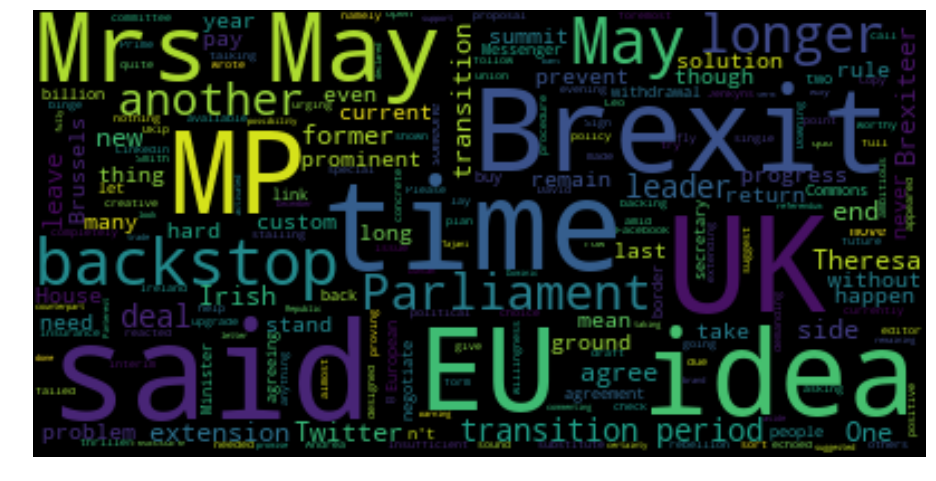

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

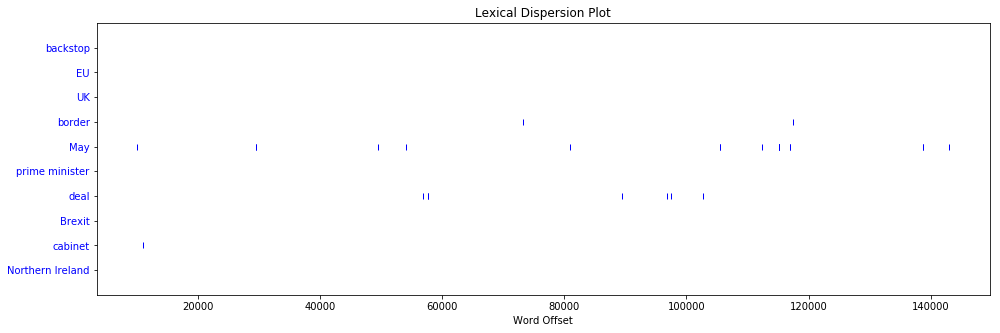

In [27]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['backstop', 'EU','UK', 'border', 'May', 'prime minister', 'deal', 'Brexit', 'cabinet', 'Northern Ireland']
content.dispersion_plot(topics)

### We can observe that 'May' is being discussed throughout the article along with references to border, deal & cabinet. 

In [28]:
tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

# Print the model output
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.027*"would" + 0.020*"said" + 0.018*"transition" + 0.015*"brexit" + 0.015*"the" + 0.013*"backstop" + 0.013*"parliament" + 0.011*"but" + 0.011*"deal" + 0.011*"period" + 0.008*"agree" + 0.008*"get" + 0.008*"twitter" + 0.008*"new" + 0.008*"one" + 0.008*"irish" + 0.008*"theresa" + 0.008*"end" + 0.006*"remain" + 0.006*"long"'), (1, '0.027*"may" + 0.020*"uk" + 0.018*"time" + 0.015*"eu" + 0.015*"mrs" + 0.013*"idea" + 0.013*"longer" + 0.011*"mps" + 0.011*"another" + 0.008*"extension" + 0.008*"it" + 0.008*"sides" + 0.008*"leave" + 0.008*"former" + 0.008*"could" + 0.006*"brussels" + 0.006*"and" + 0.006*"two" + 0.006*"mp" + 0.006*"leaders"')]


In [ ]:
'''Save the model'''

temp_file = datapath("/home/dsxuser/lda_model")
lda.save(temp_file)

'''Load the model'''

lda = LdaModel.load(temp_file)

'''Update the model on new and unseen data'''

lda.update(new_data)

In [30]:
'''Compute Perplexity'''

# a measure of how good the model is. Lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.47675016954

Coherence Score:  0.861694263227


#### pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [31]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      50.185852        1       1  0.100527  0.0
1      49.814148        1       2 -0.100527  0.0, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
231   Default  7.000000         may  7.000000  30.0000  30.0000
89    Default  7.000000       would  7.000000  29.0000  29.0000
156   Default  5.000000          uk  5.000000  28.0000  28.0000
333   Default  5.000000        said  5.000000  27.0000  27.0000
196   Default  4.000000        time  4.000000  26.0000  26.0000
40    Default  4.000000  transition  4.000000  25.0000  25.0000
2     Default  4.000000          eu  4.000000  24.0000  24.0000
317   Default  4.000000         mrs  4.000000  23.0000  23.0000
96    Default  4.000000      brexit  4.000000  22.0000  22.0000
72    Default  4.000000         the  4.000000  21.0000  21.0000
179   Default  3.000000        idea  3.000000  20.0000  20.0000
42    Default  3.000000      longer  3.000000  19.0000  19.0000
4     Default  3.000000    backstop  3.000000  18.0000  18.0000
193   Default  3.000000  parliament  3.000000  17.0000  17.0000
222   Default  3.000000         mps  3.000000  16.0000  16.0000
85    Default  3.000000     another  3.000000  15.0000  15.0000
116   Default  3.000000         but  3.000000  14.0000  14.0000
309   Default  3.000000        deal  3.000000  13.0000  13.0000
216   Default  3.000000      period  3.000000  12.0000  12.0000
29    Default  2.000000   extension  2.000000  11.0000  11.0000
54    Default  2.000000          it  2.000000  10.0000  10.0000
175   Default  2.000000       leave  2.000000   9.0000   9.0000
103   Default  2.000000       could  2.000000   8.0000   8.0000
115   Default  2.000000       sides  2.000000   7.0000   7.0000
281   Default  2.000000      former  2.000000   6.0000   6.0000
159   Default  2.000000         get  2.000000   5.0000   5.0000
265   Default  2.000000       agree  2.000000   4.0000   4.0000
177   Default  2.000000     twitter  2.000000   3.0000   3.0000
259   Default  2.000000       irish  2.000000   2.0000   2.0000
320   Default  2.000000     theresa  2.000000   1.0000   1.0000
...       ...       ...         ...       ...      ...      ...
103    Topic2  2.093499       could  2.409052   0.5565  -4.8007
115    Topic2  2.093499       sides  2.409052   0.5565  -4.8007
54     Topic2  2.093499          it  2.409053   0.5565  -4.8007
281    Topic2  2.093499      former  2.409052   0.5565  -4.8007
29     Topic2  2.093499   extension  2.409053   0.5565  -4.8007
175    Topic2  2.093499       leave  2.409052   0.5565  -4.8007
136    Topic2  1.491361        take  1.807158   0.5048  -5.1398
75     Topic2  1.491361          mp  1.807158   0.5048  -5.1398
110    Topic2  1.491361         and  1.807158   0.5048  -5.1398
137    Topic2  1.491361        hard  1.807158   0.5048  -5.1398
52     Topic2  1.491361  withdrawal  1.807158   0.5048  -5.1398
289    Topic2  1.491361     prevent  1.807158   0.5048  -5.1398
140    Topic2  1.491361  brexiteers  1.807158   0.5048  -5.1398
300    Topic2  1.491361     commons  1.807158   0.5048  -5.1398
67     Topic2  1.491361    solution  1.807158   0.5048  -5.1398
78     Topic2  1.491361     current  1.807158   0.5048  -5.1398
264    Topic2  1.491361    billions  1.807158   0.5048  -5.1398
152    Topic2  1.491361       never  1.807158   0.5048  -5.1398
84     Topic2  1.491361   secretary  1.807158   0.5048  -5.1398
95     Topic2  1.491361     problem  1.807158   0.5048  -5.1398
220    Topic2  1.491361    brussels  1.807158   0.5048  -5.1398
219    Topic2  1.491361      leader  1.807158   0.5048  -5.1398
121    Topic2  1.491361     leaders  1.807158   0.5048  -5.1398
106    Topic2  1.491361         let  1.807158   0.5048  -5.1398
217    Topic2  1.491361         two  1.807158   0.5048  -5.1398
21     Topic2  1.491361    progress  1.807158   0

### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.